In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titles_df = pd.read_csv('Resources/netflix full.csv')
df = titles_df[['Title','Hidden Gem Score','Netflix Release Date']].dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9415 entries, 0 to 9424
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 9415 non-null   object 
 1   Hidden Gem Score      9415 non-null   float64
 2   Netflix Release Date  9415 non-null   object 
dtypes: float64(1), object(2)
memory usage: 294.2+ KB


In [3]:
df['diff_years'] = pd.Timestamp.now().normalize() -pd.to_datetime(df['Netflix Release Date'])
df

,Title,Hidden Gem Score,Netflix Release Date,diff_years
0,Lets Fight Ghost,4.3,2021-03-04,242 days
1,HOW TO BUILD A GIRL,7.0,2021-03-04,242 days
2,The Con-Heartist,8.6,2021-03-03,243 days
3,Gleboka woda,8.7,2021-03-03,243 days
4,Only a Mother,8.3,2021-03-03,243 days
...,...,...,...,...
9420,13 Going on 30,3.1,2015-04-14,2393 days
9421,LIFE 2.0,8.2,2015-04-14,2393 days
9422,Brand New Day,8.6,2015-04-14,2393 days
9423,Daniel Arends: Blessuretijd,8.8,2015-04-14,2393 days


In [4]:
df.sort_values('diff_years')

,Title,Hidden Gem Score,Netflix Release Date,diff_years
0,Lets Fight Ghost,4.3,2021-03-04,242 days
1270,Quer�ncia,9.1,2021-03-04,242 days
1,HOW TO BUILD A GIRL,7.0,2021-03-04,242 days
2,The Con-Heartist,8.6,2021-03-03,243 days
3,Gleboka woda,8.7,2021-03-03,243 days
...,...,...,...,...
8002,Labor Day,2.6,2015-04-14,2393 days
8001,Dark Skies,2.6,2015-04-14,2393 days
8000,Woochi - The Demon Slayer,6.8,2015-04-14,2393 days
8014,The Code,6.8,2015-04-14,2393 days


In [5]:
df['diff_years']=(df['diff_years'].dt.days)/365.2425
df

,Title,Hidden Gem Score,Netflix Release Date,diff_years
0,Lets Fight Ghost,4.3,2021-03-04,0.662573
1,HOW TO BUILD A GIRL,7.0,2021-03-04,0.662573
2,The Con-Heartist,8.6,2021-03-03,0.665311
3,Gleboka woda,8.7,2021-03-03,0.665311
4,Only a Mother,8.3,2021-03-03,0.665311
...,...,...,...,...
9420,13 Going on 30,3.1,2015-04-14,6.551811
9421,LIFE 2.0,8.2,2015-04-14,6.551811
9422,Brand New Day,8.6,2015-04-14,6.551811
9423,Daniel Arends: Blessuretijd,8.8,2015-04-14,6.551811


In [6]:
slope, intercept, r, p, std = st.linregress(df['Hidden Gem Score'],df['diff_years'])
fit = slope*df['Hidden Gem Score']+intercept
r

-0.41155320255739203

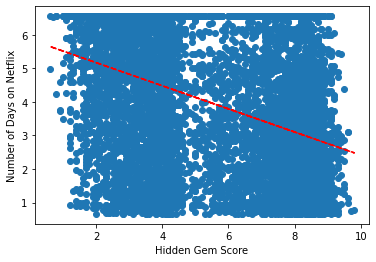

In [7]:
gem_score = df.loc[:,'Hidden Gem Score']
time_on_netflix = df.loc[:,'diff_years']
plt.scatter(gem_score, time_on_netflix)
plt.plot(gem_score, fit, "--", color='r')
# plt.xticks(happiness_index, rotation=90)
# plt.axis([2,10,80,150])
plt.xlabel('Hidden Gem Score')
plt.ylabel('Number of Days on Netflix')
plt.show()

In [8]:
df['Hidden Gem Score'].unique()

array([4.3, 7. , 8.6, 8.7, 8.3, 5.3, 2. , 7.8, 8.8, 3.5, 2.8, 4.4, 8.5,
       3.8, 6.7, 7.1, 8.4, 7.6, 7.7, 6.2, 9.3, 7.3, 4.2, 4.1, 8.2, 8.1,
       6.4, 8. , 7.9, 8.9, 7.4, 3.1, 3.6, 6.3, 5.4, 4. , 2.6, 9. , 2.3,
       9.2, 6.6, 3.4, 2.5, 3.9, 2.4, 5.9, 6.8, 3.7, 6.1, 5.7, 7.2, 3. ,
       5. , 9.7, 3.2, 9.1, 2.9, 6. , 6.9, 9.8, 7.5, 2.2, 5.8, 5.6, 1.9,
       4.9, 1.7, 3.3, 1.4, 2.7, 1.5, 4.5, 1.6, 1.2, 6.5, 2.1, 5.2, 5.1,
       5.5, 4.6, 9.4, 9.6, 4.7, 4.8, 9.5, 1.3, 1.8, 1. , 0.9, 0.8, 1.1,
       0.6, 0.7])

In [9]:
bins = [0,1,2,3,4,5,6,7,8,9,10]
group_labels = ['0 to 1','1 to 2','2 to 3','3 to 4','4 to 5','5 to 6','6 to 7', '7 to 8','8 to 9','9 to 10']
len(bins), len(group_labels)

(11, 10)

In [10]:
pd.cut(df['Hidden Gem Score'],bins,labels=group_labels)

0       4 to 5
1       6 to 7
2       8 to 9
3       8 to 9
4       8 to 9
         ...  
9420    3 to 4
9421    8 to 9
9422    8 to 9
9423    8 to 9
9424    8 to 9
Name: Hidden Gem Score, Length: 9415, dtype: category
Categories (10, object): ['0 to 1' < '1 to 2' < '2 to 3' < '3 to 4' ... '6 to 7' < '7 to 8' < '8 to 9' < '9 to 10']

In [11]:
df["Gem Group"] = pd.cut(df['Hidden Gem Score'],bins,labels=group_labels)
df

,Title,Hidden Gem Score,Netflix Release Date,diff_years,Gem Group
0,Lets Fight Ghost,4.3,2021-03-04,0.662573,4 to 5
1,HOW TO BUILD A GIRL,7.0,2021-03-04,0.662573,6 to 7
2,The Con-Heartist,8.6,2021-03-03,0.665311,8 to 9
3,Gleboka woda,8.7,2021-03-03,0.665311,8 to 9
4,Only a Mother,8.3,2021-03-03,0.665311,8 to 9
...,...,...,...,...,...
9420,13 Going on 30,3.1,2015-04-14,6.551811,3 to 4
9421,LIFE 2.0,8.2,2015-04-14,6.551811,8 to 9
9422,Brand New Day,8.6,2015-04-14,6.551811,8 to 9
9423,Daniel Arends: Blessuretijd,8.8,2015-04-14,6.551811,8 to 9


In [12]:
df_group = df.groupby('Gem Group')
count = df_group.count()

In [13]:
df_group = df_group[['Hidden Gem Score', 'diff_years']].mean()

In [14]:
df_group['Number of Titles'] = count['Title']
df_group

,Hidden Gem Score,diff_years,Number of Titles
Gem Group,,,
0 to 1,0.862500,5.443130,16
1 to 2,1.699475,5.255142,571
2 to 3,2.578407,4.984562,1218
3 to 4,3.598183,4.576687,1871
4 to 5,4.334959,4.548305,964
5 to 6,5.590028,3.492318,361
6 to 7,6.597767,3.476465,627
7 to 8,7.620925,3.386097,1362
8 to 9,8.450196,2.919656,2291


In [15]:
avg_slope, avg_intercept, avg_r, avg_p, avg_std = st.linregress(df_group['Hidden Gem Score'],df_group['diff_years'])
avg_fit = avg_slope*df_group['Hidden Gem Score']+avg_intercept
avg_r

-0.9856633097151241

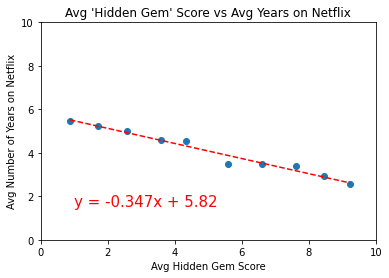

In [24]:
avg_gem = df_group.loc[:,'Hidden Gem Score']
day_avg = df_group.loc[:,'diff_years']
plt.scatter(avg_gem, day_avg)
plt.plot(avg_gem, avg_fit, "--", color='r')
text = "y = " + str(round(avg_slope,4)) + "x + " + str(round(avg_intercept,2))
# plt.xticks(happiness_index, rotation=90)
plt.axis([0,10,0,10])
plt.xlabel('Avg Hidden Gem Score')
plt.ylabel('Avg Number of Years on Netflix')
plt.title("Avg 'Hidden Gem' Score vs Avg Years on Netflix")
plt.annotate(text,(1,1.55),fontsize=15, color="r")
plt.savefig('Images/gemScore_v_Time.png', facecolor='w')
plt.show()

<AxesSubplot:xlabel='Gem Group'>

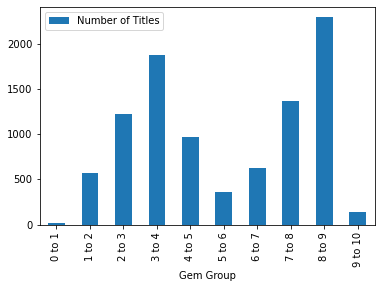

In [17]:
df_group.plot(y='Number of Titles',kind='bar')